<a href="https://colab.research.google.com/github/ErinaYoshida/kikagaku/blob/main/iris%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
df_f = pd.DataFrame(data=data, columns=feature_names)
print(df_f)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [108]:
df_f.shape

(150, 4)

In [109]:
target = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [110]:
df_target = pd.DataFrame(data=target, columns=["target"])
df_target.shape

(150, 1)

In [111]:
df = pd.concat([df_f, df_target], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [112]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [113]:
#sns.pairplot(df)

In [114]:
mean = df.mean()
sigma = df.std()
cols = df.columns
_df = df
for col in cols:
  low = mean[col] - 3 * sigma[col]
  high = mean[col] + 3 * sigma[col]
  _df = df[(_df[col] >= low) & (df[col] <= high)]
  print(col, len(_df))

sepal length (cm) 150
sepal width (cm) 149
petal length (cm) 149
petal width (cm) 149
target 149


In [115]:
len(_df)

149

In [116]:
df_target["target"].unique()

array([0, 1, 2])

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_f, df_target, test_size=0.2)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (120, 4)
x_test:  (30, 4)
y_train:  (120, 1)
y_test:  (30, 1)


In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [119]:
pred = model.predict(x_test)

In [120]:
model.score(x_train, y_train)

0.9279489130232953

In [121]:
model.score(x_test, y_test)

0.9367303776565974

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [123]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
x_train2 = scaler.transform(x_train)
x_test2 = scaler.transform(x_test)

In [125]:
model = LinearRegression().fit(x_train2, y_train)

In [126]:
model.score(x_train2, y_train)

0.9279489130232953

In [127]:
model.score(x_test2, y_test)

0.9367303776565974

In [128]:
model.coef_

array([[-0.06633681, -0.02520918,  0.42471869,  0.41638958]])

In [129]:
df_f.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [130]:
A = []
for i in model.coef_:
  for j in i:
    A.append(j)
A

[-0.06633681026344383,
 -0.025209183904532972,
 0.424718686430203,
 0.4163895775352541]

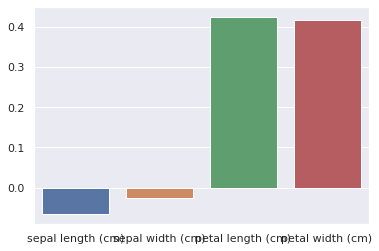

In [132]:
sns.barplot(x=df_f.columns, y=A)

 petal length, petal width の説明力は相対的に大きい
 その2つにに比べると小さいが、sepal length > sepal width である
 sepal width を省いてもう一度重回帰分析してみるのもあり(?)